<a href="https://colab.research.google.com/github/SeonkookHeo/semi-project/blob/main/24_03_2122_%ED%97%88%EC%84%A0%EA%B5%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. 한글폰트 설치

> ## 1) 한글 폰트 설치

In [61]:
!apt-get -qq -y install fonts-nanum > /dev/null

!rm -rf ~/.cache/matplotlib -rf

> ## 2) 설치 후 '런터임 다시 시작'

In [ ]:
import os

os.kill(os.getpid(), 9)

> ## 3) 한글 폰트 설정

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False

plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
import warnings
warnings.filterwarnings('ignore')

#패션 데이터 전처리

# 패션 데이터셋

> ## 1) 2023년 2월 15일 패션 데이터셋

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

DF = pd.read_csv('/content/drive/MyDrive/5조/03. 데이터/패션 데이터/230215.csv')

* 패션 데이터셋 정보

In [5]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858215 entries, 0 to 858214
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   category_large_desc   858215 non-null  object
 1   category_middle_desc  858215 non-null  object
 2   category_small_desc   858215 non-null  object
 3   item                  676959 non-null  object
 4   color                 711970 non-null  object
 5   use                   242476 non-null  object
 6   material              755054 non-null  object
 7   print_pattern         368166 non-null  object
 8   characteristic        547034 non-null  object
 9   detail                589722 non-null  object
 10  age                   3784 non-null    object
 11  weight                41831 non-null   object
 12  season                830 non-null     object
 13  sensibility           603684 non-null  object
 14  sale_price            858215 non-null  int64 
 15  recent_sale_count

> ## 2) 결측치 확인

In [6]:
DF.head(10)

,category_large_desc,category_middle_desc,category_small_desc,item,color,use,material,print_pattern,characteristic,detail,age,weight,season,sensibility,sale_price,recent_sale_count
0,여성복,원피스,점프슈트,바람막이/반바지/여름점프수트/반팔점프수트/반바지점프수트/점프수트,베이지/블랙,NaN,코튼/폴리에스터/스판/나일론,체크,NaN,NaN,NaN,NaN,NaN,NaN,28800,0
1,여성복,원피스,점프슈트,점프수트/오버롤팬츠/데님점프수트/데일리점프수트,NaN,NaN,데님/코튼/폴리에스터/나일론,체크,빈티지,스트링/오버롤/자수/워싱,NaN,NaN,NaN,레이어드/귀여운,28800,0
2,여성복,원피스,점프슈트,포켓점프수트/점프수트/데님점프수트/데일리점프수트,NaN,NaN,데님/코튼/폴리에스터/나일론,NaN,NaN,스트링/오버롤,NaN,NaN,NaN,귀여운,28800,0
3,여성복,원피스,점프슈트,스트링점프수트/반팔점프수트/반바지/반바지점프수트/점프수트/칼라점프슈트/데일리점프수트,베이지/블랙/그레이,캠핑룩,폴리에스터/아크릴/나일론,체크,NaN,루즈핏/스트링,NaN,NaN,NaN,활동적인,35800,0
4,여성복,원피스,점프슈트,NaN,베이지/블랙/화이트/아이보리/카키,NaN,폴리에스터/나일론,별,시원한,루즈핏/슬림핏/스트링/커팅,NaN,NaN,NaN,캐주얼한,28800,1
5,여성복,원피스,점프슈트,NaN,베이지/그레이,NaN,코튼,NaN,NaN,스트링/오버롤,NaN,NaN,NaN,NaN,58900,0
6,여성복,원피스,점프슈트,오버롤데님/여름점프수트/오버롤팬츠/데님점프수트/점프수트,NaN,NaN,데님,NaN,탄탄한/유니크한,자수/오버롤/랩,NaN,NaN,NaN,유니크한/캐주얼한,28500,0
7,여성복,원피스,점프슈트,오버롤팬츠/점프수트/여름점프수트,라이트블루/차콜,NaN,텐셀/데님,NaN,시원한,스트링/오버롤/와이드,NaN,NaN,NaN,NaN,29430,1
8,여성복,원피스,점프슈트,바캉스룩원피스,차콜/블랙/카키,임산부/55사이즈,폴리에스터,NaN,NaN,스트링/오버롤/와이드,NaN,NaN,NaN,NaN,13900,0
9,여성복,원피스,점프슈트,NaN,베이지/블랙/카키,NaN,폴리에스터,별,NaN,스트링,NaN,NaN,NaN,레이어드/캐주얼한,27800,0


In [7]:
DF['category_small_desc'].value_counts(dropna = False)

티셔츠         153295
롱원피스        102178
블라우스/셔츠      99994
니트           99703
자켓           66168
카디건          53175
데님팬츠         48047
면바지          43986
롱스커트         39142
점퍼           30009
미니원피스        21066
뷔스티에/베스트     19191
코트           17884
반바지          15526
플레어스커트       11105
H라인스커트        9951
점프슈트          7221
플리츠스커트        3972
조거팬츠          3955
코듀로이팬츠        2382
미니스커트         1477
리넨원피스         1357
니트원피스         1352
플리츠원피스        1116
머메이드스커트        961
스퀘어넥원피스        878
트위드원피스         807
데님스커트          615
뷔스티에원피스        592
랩원피스           440
슬랙스            286
셔츠원피스          214
쉬폰원피스          109
데님원피스           61
Name: category_small_desc, dtype: int64

In [8]:
DF.isnull().sum(axis = 0)

category_large_desc          0
category_middle_desc         0
category_small_desc          0
item                    181256
color                   146245
use                     615739
material                103161
print_pattern           490049
characteristic          311181
detail                  268493
age                     854431
weight                  816384
season                  857385
sensibility             254531
sale_price                   0
recent_sale_count            0
dtype: int64

* 필요없는 데이터 삭제

In [9]:
columns_to_drop = ['category_large_desc', 'category_middle_desc',  'use', 'print_pattern', 'characteristic',
                   'detail', 'age', 'weight', 'season', 'sensibility']

DF.drop(columns = columns_to_drop, inplace = True)

In [10]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858215 entries, 0 to 858214
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   category_small_desc  858215 non-null  object
 1   item                 676959 non-null  object
 2   color                711970 non-null  object
 3   material             755054 non-null  object
 4   sale_price           858215 non-null  int64 
 5   recent_sale_count    858215 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 39.3+ MB


In [11]:
DF.head(10)

,category_small_desc,item,color,material,sale_price,recent_sale_count
0,점프슈트,바람막이/반바지/여름점프수트/반팔점프수트/반바지점프수트/점프수트,베이지/블랙,코튼/폴리에스터/스판/나일론,28800,0
1,점프슈트,점프수트/오버롤팬츠/데님점프수트/데일리점프수트,NaN,데님/코튼/폴리에스터/나일론,28800,0
2,점프슈트,포켓점프수트/점프수트/데님점프수트/데일리점프수트,NaN,데님/코튼/폴리에스터/나일론,28800,0
3,점프슈트,스트링점프수트/반팔점프수트/반바지/반바지점프수트/점프수트/칼라점프슈트/데일리점프수트,베이지/블랙/그레이,폴리에스터/아크릴/나일론,35800,0
4,점프슈트,NaN,베이지/블랙/화이트/아이보리/카키,폴리에스터/나일론,28800,1
5,점프슈트,NaN,베이지/그레이,코튼,58900,0
6,점프슈트,오버롤데님/여름점프수트/오버롤팬츠/데님점프수트/점프수트,NaN,데님,28500,0
7,점프슈트,오버롤팬츠/점프수트/여름점프수트,라이트블루/차콜,텐셀/데님,29430,1
8,점프슈트,바캉스룩원피스,차콜/블랙/카키,폴리에스터,13900,0
9,점프슈트,NaN,베이지/블랙/카키,폴리에스터,27800,0


* 결측치 치환

In [12]:
DF['item'].fillna(DF['category_small_desc'], inplace = True)

DF.head(10)

,category_small_desc,item,color,material,sale_price,recent_sale_count
0,점프슈트,바람막이/반바지/여름점프수트/반팔점프수트/반바지점프수트/점프수트,베이지/블랙,코튼/폴리에스터/스판/나일론,28800,0
1,점프슈트,점프수트/오버롤팬츠/데님점프수트/데일리점프수트,NaN,데님/코튼/폴리에스터/나일론,28800,0
2,점프슈트,포켓점프수트/점프수트/데님점프수트/데일리점프수트,NaN,데님/코튼/폴리에스터/나일론,28800,0
3,점프슈트,스트링점프수트/반팔점프수트/반바지/반바지점프수트/점프수트/칼라점프슈트/데일리점프수트,베이지/블랙/그레이,폴리에스터/아크릴/나일론,35800,0
4,점프슈트,점프슈트,베이지/블랙/화이트/아이보리/카키,폴리에스터/나일론,28800,1
5,점프슈트,점프슈트,베이지/그레이,코튼,58900,0
6,점프슈트,오버롤데님/여름점프수트/오버롤팬츠/데님점프수트/점프수트,NaN,데님,28500,0
7,점프슈트,오버롤팬츠/점프수트/여름점프수트,라이트블루/차콜,텐셀/데님,29430,1
8,점프슈트,바캉스룩원피스,차콜/블랙/카키,폴리에스터,13900,0
9,점프슈트,점프슈트,베이지/블랙/카키,폴리에스터,27800,0


In [13]:
DF.isnull().sum(axis = 0)

category_small_desc         0
item                        0
color                  146245
material               103161
sale_price                  0
recent_sale_count           0
dtype: int64

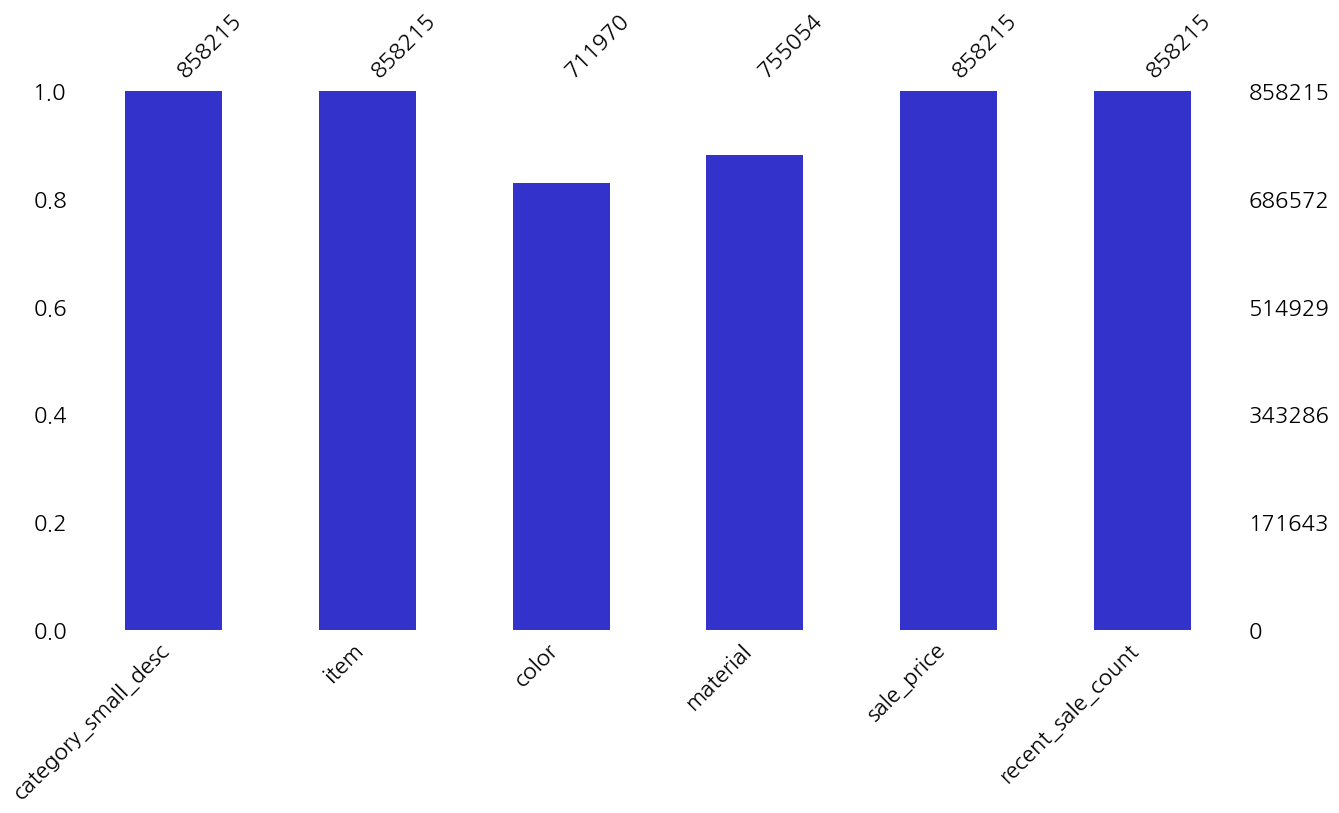

In [14]:
import missingno as msno

msno.bar(DF,
         figsize = (15, 7),
         color = (0.2, 0.2, 0.8));

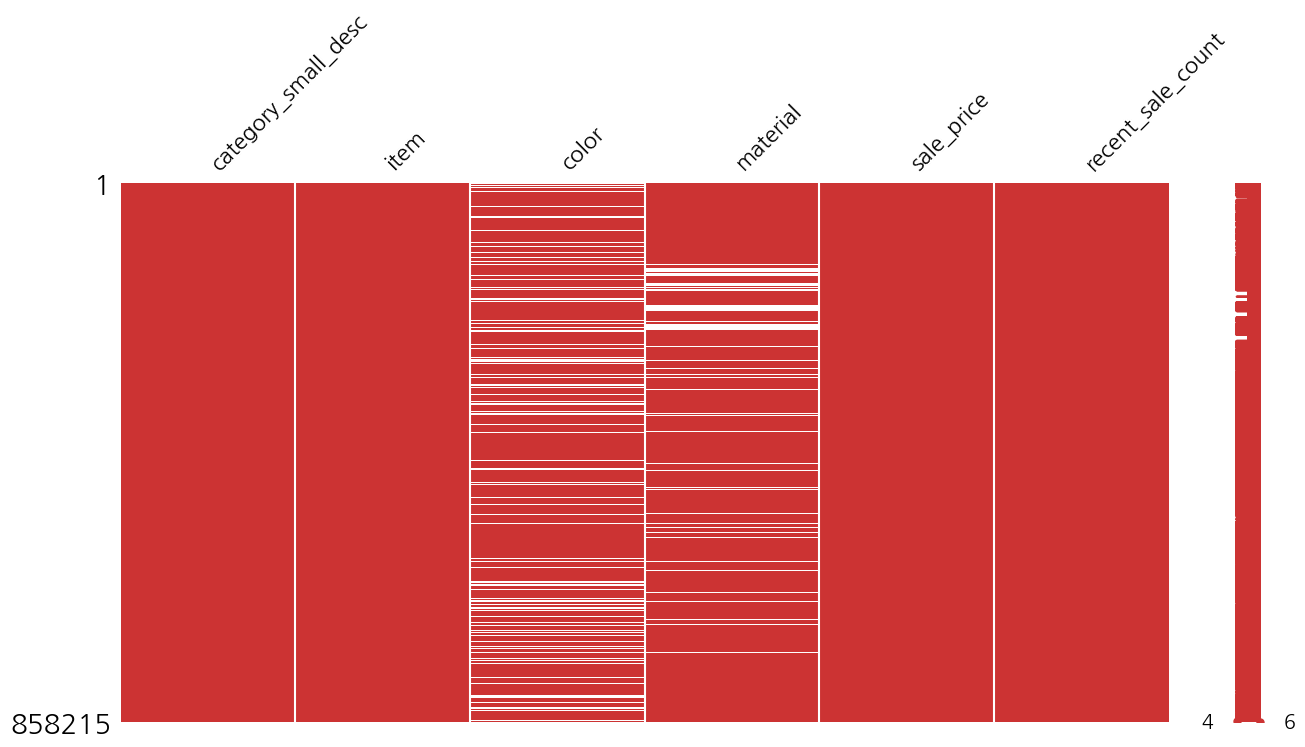

In [15]:
msno.matrix(DF,
            figsize = (15, 7),
            color = (0.8, 0.2, 0.2));

In [16]:
DF.dropna(inplace = True)
DF.head()

,category_small_desc,item,color,material,sale_price,recent_sale_count
0,점프슈트,바람막이/반바지/여름점프수트/반팔점프수트/반바지점프수트/점프수트,베이지/블랙,코튼/폴리에스터/스판/나일론,28800,0
3,점프슈트,스트링점프수트/반팔점프수트/반바지/반바지점프수트/점프수트/칼라점프슈트/데일리점프수트,베이지/블랙/그레이,폴리에스터/아크릴/나일론,35800,0
4,점프슈트,점프슈트,베이지/블랙/화이트/아이보리/카키,폴리에스터/나일론,28800,1
5,점프슈트,점프슈트,베이지/그레이,코튼,58900,0
7,점프슈트,오버롤팬츠/점프수트/여름점프수트,라이트블루/차콜,텐셀/데님,29430,1


In [17]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 646151 entries, 0 to 858214
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   category_small_desc  646151 non-null  object
 1   item                 646151 non-null  object
 2   color                646151 non-null  object
 3   material             646151 non-null  object
 4   sale_price           646151 non-null  int64 
 5   recent_sale_count    646151 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 34.5+ MB


In [18]:
DF.isnull().sum(axis = 0)

category_small_desc    0
item                   0
color                  0
material               0
sale_price             0
recent_sale_count      0
dtype: int64

> ## 3) 판매된 물품만 추려내기

In [19]:
DF = DF[DF['recent_sale_count'] >= 1]

In [20]:
DF.head()

,category_small_desc,item,color,material,sale_price,recent_sale_count
4,점프슈트,점프슈트,베이지/블랙/화이트/아이보리/카키,폴리에스터/나일론,28800,1
7,점프슈트,오버롤팬츠/점프수트/여름점프수트,라이트블루/차콜,텐셀/데님,29430,1
19,점프슈트,스트링점프수트/반바지/반바지점프수트/점프수트/캐주얼점프수트/데일리점프수트,베이지/블랙,나일론,28800,2
28,점프슈트,와이드점프수트/점프수트/뷔스티에점프수트/나시점프수트,퍼플/베이지/블랙,코튼/폴리에스터/쉬폰/나일론,15800,1
40,점프슈트,캐주얼데님팬츠/오버롤팬츠/오버롤데님/데님팬츠,블루/라이트블루/차콜,데님,42000,1


In [21]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11970 entries, 4 to 858193
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category_small_desc  11970 non-null  object
 1   item                 11970 non-null  object
 2   color                11970 non-null  object
 3   material             11970 non-null  object
 4   sale_price           11970 non-null  int64 
 5   recent_sale_count    11970 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 654.6+ KB


> ## 4) 앞 열에 시계열 데이터 추가

In [22]:
DF.insert(0, 'Time', '2023_02_15')

DF.head()

,Time,category_small_desc,item,color,material,sale_price,recent_sale_count
4,2023_02_15,점프슈트,점프슈트,베이지/블랙/화이트/아이보리/카키,폴리에스터/나일론,28800,1
7,2023_02_15,점프슈트,오버롤팬츠/점프수트/여름점프수트,라이트블루/차콜,텐셀/데님,29430,1
19,2023_02_15,점프슈트,스트링점프수트/반바지/반바지점프수트/점프수트/캐주얼점프수트/데일리점프수트,베이지/블랙,나일론,28800,2
28,2023_02_15,점프슈트,와이드점프수트/점프수트/뷔스티에점프수트/나시점프수트,퍼플/베이지/블랙,코튼/폴리에스터/쉬폰/나일론,15800,1
40,2023_02_15,점프슈트,캐주얼데님팬츠/오버롤팬츠/오버롤데님/데님팬츠,블루/라이트블루/차콜,데님,42000,1


# 정규표현식

> ## 1) 용품 구분

In [23]:
DF['item'].value_counts()

티셔츠                                                         362
니트                                                          253
블라우스/셔츠                                                     249
롱원피스                                                        202
카디건                                                         179
                                                           ... 
겨울카디건/박시카디건/벌룬카디건/퍼카디건/오피스룩카디건/울카디건/간절기카디건/오버핏카디건/루즈핏카디건      1
가을카디건/롱카디건/니트카디건/로브카디건                                        1
바캉스룩카디건/빈티지카디건/로브카디건                                          1
긴팔가디건/꽈배기니트카디건/니트카디건/셔링카디건/베이식카디건                             1
플리츠스커트/A라인스커트/봄스커트/테니스스커트/미니스커트                               1
Name: item, Length: 8305, dtype: int64

In [24]:
item = DF['item'].unique().tolist()

In [25]:
item = str(item)

In [26]:
item[:1000]

"['점프슈트', '오버롤팬츠/점프수트/여름점프수트', '스트링점프수트/반바지/반바지점프수트/점프수트/캐주얼점프수트/데일리점프수트', '와이드점프수트/점프수트/뷔스티에점프수트/나시점프수트', '캐주얼데님팬츠/오버롤팬츠/오버롤데님/데님팬츠', '오버롤팬츠/오버롤데님', '오버롤팬츠', '밴딩점프수트/셔링점프수트/점프수트/프릴점프수트', '가을점프슈트/점프수트/코듀로이팬츠/코듀로이원피스', '벨트팬츠/점프수트/데님팬츠/데님점프수트', '점프수트/데님점프수트', '슬림원피스/아나운서원피스/하객룩원피스/정장원피스/나시원피스/상견례원피스', '가을원피스/하객룩원피스/정장원피스/상견례원피스/랩원피스/플레어원피스', '점프수트', '가을점프슈트/트레이닝세트/점프수트', '쉬폰원피스', '미니원피스/빅사이즈원피스/미디원피스/하객룩원피스/핀턱원피스/단추원피스/칼라원피스/봄원피스/빅칼라원피스', '데님원피스', '임부복/임부원피스/데님원피스', '미디원피스/데님셔츠/임부복/수유원피스/데님원피스/봄원피스/셔츠원피스/간절기원피스', '반오픈원피스/셔츠원피스/미니원피스/데님원피스', '레이어드원피스/반팔원피스/미디원피스/스트링원피스/퍼프원피스/볼륨원피스/여름원피스', '플리츠원피스', '캐주얼원피스', '경량원피스', '아나운서원피스/하객룩원피스/오피스룩원피스/정장원피스/상견례원피스', 'H라인원피스', '웨딩드레스/셀프웨딩드레스/브로치원피스/브라이덜샤워드레스/스퀘어넥원피스', '스퀘어넥원피스', '숏점프수트/데님점프수트/포켓점프수트/점프수트/칼라점프슈트/리본점프수트', '와이드점프수트/점프수트/데일리점프수트/나시점프수트', '셔츠원피스', '77사이즈원피스/가을원피스/오피스룩원피스/정장원피스/상견례원피스', '반바지/반바지점프수트/데님점프수트/가을점프슈트/긴팔점프수트/점프수트', '포켓점프수트/점프수트/칼라점프슈트', '리넨원피스', '플리츠원피스/미니원피스/레이어드원피스', '시폰원피스/가을원피스/데일리원피스/플로럴원피스', '집업점프수트/기모후드티/기모점프수트/점프수트/후드점프

In [27]:
item = item.replace("'", ",").replace(" ", ",").replace("/", ",")

In [28]:
item[:1000]

'[,점프슈트,,,,오버롤팬츠,점프수트,여름점프수트,,,,스트링점프수트,반바지,반바지점프수트,점프수트,캐주얼점프수트,데일리점프수트,,,,와이드점프수트,점프수트,뷔스티에점프수트,나시점프수트,,,,캐주얼데님팬츠,오버롤팬츠,오버롤데님,데님팬츠,,,,오버롤팬츠,오버롤데님,,,,오버롤팬츠,,,,밴딩점프수트,셔링점프수트,점프수트,프릴점프수트,,,,가을점프슈트,점프수트,코듀로이팬츠,코듀로이원피스,,,,벨트팬츠,점프수트,데님팬츠,데님점프수트,,,,점프수트,데님점프수트,,,,슬림원피스,아나운서원피스,하객룩원피스,정장원피스,나시원피스,상견례원피스,,,,가을원피스,하객룩원피스,정장원피스,상견례원피스,랩원피스,플레어원피스,,,,점프수트,,,,가을점프슈트,트레이닝세트,점프수트,,,,쉬폰원피스,,,,미니원피스,빅사이즈원피스,미디원피스,하객룩원피스,핀턱원피스,단추원피스,칼라원피스,봄원피스,빅칼라원피스,,,,데님원피스,,,,임부복,임부원피스,데님원피스,,,,미디원피스,데님셔츠,임부복,수유원피스,데님원피스,봄원피스,셔츠원피스,간절기원피스,,,,반오픈원피스,셔츠원피스,미니원피스,데님원피스,,,,레이어드원피스,반팔원피스,미디원피스,스트링원피스,퍼프원피스,볼륨원피스,여름원피스,,,,플리츠원피스,,,,캐주얼원피스,,,,경량원피스,,,,아나운서원피스,하객룩원피스,오피스룩원피스,정장원피스,상견례원피스,,,,H라인원피스,,,,웨딩드레스,셀프웨딩드레스,브로치원피스,브라이덜샤워드레스,스퀘어넥원피스,,,,스퀘어넥원피스,,,,숏점프수트,데님점프수트,포켓점프수트,점프수트,칼라점프슈트,리본점프수트,,,,와이드점프수트,점프수트,데일리점프수트,나시점프수트,,,,셔츠원피스,,,,77사이즈원피스,가을원피스,오피스룩원피스,정장원피스,상견례원피스,,,,반바지,반바지점프수트,데님점프수트,가을점프슈트,긴팔점프수트,점프수트,,,,포켓점프수트,점프수트,칼라점프슈트,,,,리넨원피스,,,,플리츠원피스,미니원피스,레이어드원피스,,,,시폰원피스,가을원피스,데일리원피스,플로럴원피스,,,,집업점프수트,기모후드티,기모점프수트,점프수트,후드점프

> ## 2) 색상 구분

In [29]:
DF['color'].value_counts()

아이보리/블랙                                          523
베이지/블랙                                           434
블랙                                               371
블랙/화이트                                           271
베이지/아이보리/블랙                                      228
                                                ... 
네이비/브라운/베이지/옐로우/라이트블루/핑크/카키/블랙/퍼플/블루/아이보리/그레이      1
라이트블루/블랙/화이트/블루/차콜                                 1
네이비/핑크/화이트/퍼플/블루/카키                                1
핑크/차콜/그린                                           1
브라운/그린/블랙/그레이                                      1
Name: color, Length: 2944, dtype: int64

In [30]:
color = DF['color'].unique().tolist()

In [31]:
color = str(color)

In [32]:
color[:1000]

"['베이지/블랙/화이트/아이보리/카키', '라이트블루/차콜', '베이지/블랙', '퍼플/베이지/블랙', '블루/라이트블루/차콜', '차콜/아이보리', '라이트블루', '라이트블루/베이지/블랙', '베이지/아이보리/블랙', '차콜', '블루', '퍼플/그레이', '핑크/레드/그린/블랙/화이트/블루', '네이비/블랙', '네이비/카키', '블랙/그레이', '아이보리/블랙/화이트', '베이지/그레이', '차콜/블랙', '블루/차콜/블랙', '아이보리', '블랙', '네이비', '퍼플', '퍼플/블랙', '화이트', '브라운/블랙', '블루/베이지', '네이비/핑크', '브라운', '베이지/블랙/골드', '베이지/블랙/그레이/화이트', '블랙/화이트', '그린/아이보리/블랙/베이지', '핑크/그린/화이트', '라이트블루/차콜/그레이', '라이트블루/차콜/블랙', '블루/옐로우', '브라운/아이보리/블랙', '핑크/블루/베이지', '브라운/베이지', '그린/오렌지/블랙', '베이지', '브라운/베이지/블랙/아이보리/카키', '핑크/블루/베이지/그린', '베이지/아이보리/화이트', '브라운/아이보리/블랙/그레이', '블루/아이보리/블랙/그레이', '브라운/민트/블랙', '네이비/블루/베이지/블랙', '네온/골드', '네온', '핑크/네온', '퍼플/핑크/네온', '블루/네온', '브라운/베이지/아이보리/블랙', '핑크/베이지/블랙/아이보리/카키', '베이지/차콜/민트', '실버/블랙', '베이지/아이보리/블랙/카키', '블루/베이지/블랙', '베이지/블랙/카키', '블랙/그레이/화이트', '아이보리/블랙', '핑크/베이지/블랙/화이트/아이보리', '브라운/베이지/블랙/화이트/아이보리', '퍼플/아이보리/블랙', '라이트블루/베이지/핑크', '핑크/블랙', '네이비/베이지/그린/옐로우', '베이지/아이보리/블랙/그레이', '브라운/베이지/블랙', '핑크/블랙/그레이', '퍼플/민트/블랙/라벤더', '브라운/베이지/라벤더/블랙/퍼플', '그린/아이보리/블랙', '아이보리/

In [33]:
color = color.replace("'", ",").replace(" ", ",").replace("/", ",")

In [34]:
color[:1000]

'[,베이지,블랙,화이트,아이보리,카키,,,,라이트블루,차콜,,,,베이지,블랙,,,,퍼플,베이지,블랙,,,,블루,라이트블루,차콜,,,,차콜,아이보리,,,,라이트블루,,,,라이트블루,베이지,블랙,,,,베이지,아이보리,블랙,,,,차콜,,,,블루,,,,퍼플,그레이,,,,핑크,레드,그린,블랙,화이트,블루,,,,네이비,블랙,,,,네이비,카키,,,,블랙,그레이,,,,아이보리,블랙,화이트,,,,베이지,그레이,,,,차콜,블랙,,,,블루,차콜,블랙,,,,아이보리,,,,블랙,,,,네이비,,,,퍼플,,,,퍼플,블랙,,,,화이트,,,,브라운,블랙,,,,블루,베이지,,,,네이비,핑크,,,,브라운,,,,베이지,블랙,골드,,,,베이지,블랙,그레이,화이트,,,,블랙,화이트,,,,그린,아이보리,블랙,베이지,,,,핑크,그린,화이트,,,,라이트블루,차콜,그레이,,,,라이트블루,차콜,블랙,,,,블루,옐로우,,,,브라운,아이보리,블랙,,,,핑크,블루,베이지,,,,브라운,베이지,,,,그린,오렌지,블랙,,,,베이지,,,,브라운,베이지,블랙,아이보리,카키,,,,핑크,블루,베이지,그린,,,,베이지,아이보리,화이트,,,,브라운,아이보리,블랙,그레이,,,,블루,아이보리,블랙,그레이,,,,브라운,민트,블랙,,,,네이비,블루,베이지,블랙,,,,네온,골드,,,,네온,,,,핑크,네온,,,,퍼플,핑크,네온,,,,블루,네온,,,,브라운,베이지,아이보리,블랙,,,,핑크,베이지,블랙,아이보리,카키,,,,베이지,차콜,민트,,,,실버,블랙,,,,베이지,아이보리,블랙,카키,,,,블루,베이지,블랙,,,,베이지,블랙,카키,,,,블랙,그레이,화이트,,,,아이보리,블랙,,,,핑크,베이지,블랙,화이트,아이보리,,,,브라운,베이지,블랙,화이트,아이보리,,,,퍼플,아이보리,블랙,,,,라이트블루,베이지,핑크,,,,핑크,블랙,,,,네이비,베이지,그린,옐로우,,,,베이지,아이보리,블랙,그레이,,,,브라운,베이지,블랙,,,,핑크,블랙,그레이,,,,퍼플,민트,블랙,라벤더,,,,브라운,베이지,라벤더,블랙,퍼플,,,,그린,아이보리,블랙,,,,아이보리,

> ## 3) 재질 구분

In [49]:
DF['material'].value_counts()

코튼                     2674
폴리에스터                  2163
폴리에스터/코튼                831
아크릴                     713
폴리에스터/아크릴               500
                       ... 
실크/폴리에스터/모달/레이온           1
스판/아크릴/나일론/모달/폴리에스터       1
레더/스판                     1
벨벳/스판/코튼                  1
코튼/스웨이드                   1
Name: material, Length: 285, dtype: int64

In [50]:
material = DF['material'].unique().tolist()

In [51]:
material = str(material)

In [53]:
material = material.replace("'", ",").replace(" ", ",").replace("/", ",")

In [54]:
material[:1000]

'[,폴리에스터,나일론,,,,텐셀,데님,,,,나일론,,,,코튼,폴리에스터,쉬폰,나일론,,,,데님,,,,폴리에스터,코튼,,,,코튼,,,,폴리에스터,,,,스판,코튼,,,,폴리에스터,스판,,,,실크,폴리에스터,스판,레이온,,,,실크,린넨,레이온,,,,데님,코튼,,,,벨벳,,,,폴리에스터,새틴,스판,,,,텐셀,스판,레이온,실크,코튼,폴리에스터,,,,실크,레이온,나일론,,,,아크릴,울,,,,폴리에스터,울,나일론,,,,폴리에스터,울,,,,코튼,폴리에스터,아크릴,나일론,,,,텐셀,폴리에스터,스판,,,,아크릴,,,,폴리에스터,코튼,레이온,,,,폴리에스터,아크릴,코튼,,,,폴리에스터,아크릴,울,,,,폴리에스터,아크릴,울,코튼,,,,폴리에스터,스판,울,,,,스판,,,,폴리에스터,아크릴,,,,레이온,,,,폴리에스터,아크릴,나일론,,,,린넨,코튼,,,,실크,스판,레이온,,,,폴리에스터,스판,코튼,,,,폴리에스터,모달,,,,아크릴,나일론,,,,코튼,울,,,,실크,폴리에스터,레이온,,,,폴리에스터,코튼,나일론,,,,폴리에스터,스웨이드,,,,폴리에스터,쉬폰,,,,폴리에스터,레이온,,,,기모,코듀로이,,,,실크,코튼,레이온,,,,텐셀,스판,,,,폴리에스터,레이온,나일론,,,,실크,폴리에스터,레이온,나일론,,,,기모,코튼,,,,폴리에스터,아크릴,스판,레이온,,,,코튼,코듀로이,,,,실크,폴리에스터,새틴,,,,폴리에스터,린넨,코튼,,,,아크릴,레이온,실크,나일론,울,,,,실크,레이온,,,,쉬폰,,,,아크릴,스판,울,나일론,,,,실크,코튼,스판,레이온,,,,실크,아크릴,울,레이온,,,,울,,,,폴리에스터,기모,코튼,,,,기모,레이온,실크,코튼,폴리에스터,,,,실크,아크릴,레이온,,,,실크,폴리에스터,새틴,레이온,,,,실크,폴리에스터,아크릴,레이온,,,,폴리에스터,기모,스판,코튼,,,,코튼,나일론,,,,스판,레이온,실크,울,폴리에스터,,,,실크,레이온,울,나일론,,,,폴리에스터,아크릴,스판,나일론,,,,스판,레이온,실크,코튼,폴리에스터,,,,울,퍼,나일론,,,,폴리에스터,스판,울,레이온,,,,코

> ## import 're' Module

In [35]:
import re

In [36]:
item = re.sub("[\d\\-\.\[\](nan)]", "", item)

In [37]:
item[:1000]

',점프슈트,,,,오버롤팬츠,점프수트,여름점프수트,,,,스트링점프수트,반바지,반바지점프수트,점프수트,캐주얼점프수트,데일리점프수트,,,,와이드점프수트,점프수트,뷔스티에점프수트,나시점프수트,,,,캐주얼데님팬츠,오버롤팬츠,오버롤데님,데님팬츠,,,,오버롤팬츠,오버롤데님,,,,오버롤팬츠,,,,밴딩점프수트,셔링점프수트,점프수트,프릴점프수트,,,,가을점프슈트,점프수트,코듀로이팬츠,코듀로이원피스,,,,벨트팬츠,점프수트,데님팬츠,데님점프수트,,,,점프수트,데님점프수트,,,,슬림원피스,아나운서원피스,하객룩원피스,정장원피스,나시원피스,상견례원피스,,,,가을원피스,하객룩원피스,정장원피스,상견례원피스,랩원피스,플레어원피스,,,,점프수트,,,,가을점프슈트,트레이닝세트,점프수트,,,,쉬폰원피스,,,,미니원피스,빅사이즈원피스,미디원피스,하객룩원피스,핀턱원피스,단추원피스,칼라원피스,봄원피스,빅칼라원피스,,,,데님원피스,,,,임부복,임부원피스,데님원피스,,,,미디원피스,데님셔츠,임부복,수유원피스,데님원피스,봄원피스,셔츠원피스,간절기원피스,,,,반오픈원피스,셔츠원피스,미니원피스,데님원피스,,,,레이어드원피스,반팔원피스,미디원피스,스트링원피스,퍼프원피스,볼륨원피스,여름원피스,,,,플리츠원피스,,,,캐주얼원피스,,,,경량원피스,,,,아나운서원피스,하객룩원피스,오피스룩원피스,정장원피스,상견례원피스,,,,H라인원피스,,,,웨딩드레스,셀프웨딩드레스,브로치원피스,브라이덜샤워드레스,스퀘어넥원피스,,,,스퀘어넥원피스,,,,숏점프수트,데님점프수트,포켓점프수트,점프수트,칼라점프슈트,리본점프수트,,,,와이드점프수트,점프수트,데일리점프수트,나시점프수트,,,,셔츠원피스,,,,사이즈원피스,가을원피스,오피스룩원피스,정장원피스,상견례원피스,,,,반바지,반바지점프수트,데님점프수트,가을점프슈트,긴팔점프수트,점프수트,,,,포켓점프수트,점프수트,칼라점프슈트,,,,리넨원피스,,,,플리츠원피스,미니원피스,레이어드원피스,,,,시폰원피스,가을원피스,데일리원피스,플로럴원피스,,,,집업점프수트,기모후드티,기모점프수트,점프수트,후드점프슈트,

In [38]:
item = re.sub(",{2,}", ",", item)

In [39]:
item[:1000]

',점프슈트,오버롤팬츠,점프수트,여름점프수트,스트링점프수트,반바지,반바지점프수트,점프수트,캐주얼점프수트,데일리점프수트,와이드점프수트,점프수트,뷔스티에점프수트,나시점프수트,캐주얼데님팬츠,오버롤팬츠,오버롤데님,데님팬츠,오버롤팬츠,오버롤데님,오버롤팬츠,밴딩점프수트,셔링점프수트,점프수트,프릴점프수트,가을점프슈트,점프수트,코듀로이팬츠,코듀로이원피스,벨트팬츠,점프수트,데님팬츠,데님점프수트,점프수트,데님점프수트,슬림원피스,아나운서원피스,하객룩원피스,정장원피스,나시원피스,상견례원피스,가을원피스,하객룩원피스,정장원피스,상견례원피스,랩원피스,플레어원피스,점프수트,가을점프슈트,트레이닝세트,점프수트,쉬폰원피스,미니원피스,빅사이즈원피스,미디원피스,하객룩원피스,핀턱원피스,단추원피스,칼라원피스,봄원피스,빅칼라원피스,데님원피스,임부복,임부원피스,데님원피스,미디원피스,데님셔츠,임부복,수유원피스,데님원피스,봄원피스,셔츠원피스,간절기원피스,반오픈원피스,셔츠원피스,미니원피스,데님원피스,레이어드원피스,반팔원피스,미디원피스,스트링원피스,퍼프원피스,볼륨원피스,여름원피스,플리츠원피스,캐주얼원피스,경량원피스,아나운서원피스,하객룩원피스,오피스룩원피스,정장원피스,상견례원피스,H라인원피스,웨딩드레스,셀프웨딩드레스,브로치원피스,브라이덜샤워드레스,스퀘어넥원피스,스퀘어넥원피스,숏점프수트,데님점프수트,포켓점프수트,점프수트,칼라점프슈트,리본점프수트,와이드점프수트,점프수트,데일리점프수트,나시점프수트,셔츠원피스,사이즈원피스,가을원피스,오피스룩원피스,정장원피스,상견례원피스,반바지,반바지점프수트,데님점프수트,가을점프슈트,긴팔점프수트,점프수트,포켓점프수트,점프수트,칼라점프슈트,리넨원피스,플리츠원피스,미니원피스,레이어드원피스,시폰원피스,가을원피스,데일리원피스,플로럴원피스,집업점프수트,기모후드티,기모점프수트,점프수트,후드점프슈트,후드집업점퍼,볼륨원피스,바캉스룩원피스,플로럴원피스,퍼프원피스,레이어드원피스,플리츠원피스,나시원피스,랩원피스,벨트원피스,가을원피스,롱원피스,데일리원피스,레이어드원피스,홈웨어잠옷,캐릭터잠옷,베이식원피스,간절기

In [40]:
color = re.sub("[\d\\-\.\[\](nan)]", "", color)

In [41]:
color[:1000]

',베이지,블랙,화이트,아이보리,카키,,,,라이트블루,차콜,,,,베이지,블랙,,,,퍼플,베이지,블랙,,,,블루,라이트블루,차콜,,,,차콜,아이보리,,,,라이트블루,,,,라이트블루,베이지,블랙,,,,베이지,아이보리,블랙,,,,차콜,,,,블루,,,,퍼플,그레이,,,,핑크,레드,그린,블랙,화이트,블루,,,,네이비,블랙,,,,네이비,카키,,,,블랙,그레이,,,,아이보리,블랙,화이트,,,,베이지,그레이,,,,차콜,블랙,,,,블루,차콜,블랙,,,,아이보리,,,,블랙,,,,네이비,,,,퍼플,,,,퍼플,블랙,,,,화이트,,,,브라운,블랙,,,,블루,베이지,,,,네이비,핑크,,,,브라운,,,,베이지,블랙,골드,,,,베이지,블랙,그레이,화이트,,,,블랙,화이트,,,,그린,아이보리,블랙,베이지,,,,핑크,그린,화이트,,,,라이트블루,차콜,그레이,,,,라이트블루,차콜,블랙,,,,블루,옐로우,,,,브라운,아이보리,블랙,,,,핑크,블루,베이지,,,,브라운,베이지,,,,그린,오렌지,블랙,,,,베이지,,,,브라운,베이지,블랙,아이보리,카키,,,,핑크,블루,베이지,그린,,,,베이지,아이보리,화이트,,,,브라운,아이보리,블랙,그레이,,,,블루,아이보리,블랙,그레이,,,,브라운,민트,블랙,,,,네이비,블루,베이지,블랙,,,,네온,골드,,,,네온,,,,핑크,네온,,,,퍼플,핑크,네온,,,,블루,네온,,,,브라운,베이지,아이보리,블랙,,,,핑크,베이지,블랙,아이보리,카키,,,,베이지,차콜,민트,,,,실버,블랙,,,,베이지,아이보리,블랙,카키,,,,블루,베이지,블랙,,,,베이지,블랙,카키,,,,블랙,그레이,화이트,,,,아이보리,블랙,,,,핑크,베이지,블랙,화이트,아이보리,,,,브라운,베이지,블랙,화이트,아이보리,,,,퍼플,아이보리,블랙,,,,라이트블루,베이지,핑크,,,,핑크,블랙,,,,네이비,베이지,그린,옐로우,,,,베이지,아이보리,블랙,그레이,,,,브라운,베이지,블랙,,,,핑크,블랙,그레이,,,,퍼플,민트,블랙,라벤더,,,,브라운,베이지,라벤더,블랙,퍼플,,,,그린,아이보리,블랙,,,,아이보리,블

In [42]:
color = re.sub(",{2,}", ",", color)

In [43]:
color[:1000]

',베이지,블랙,화이트,아이보리,카키,라이트블루,차콜,베이지,블랙,퍼플,베이지,블랙,블루,라이트블루,차콜,차콜,아이보리,라이트블루,라이트블루,베이지,블랙,베이지,아이보리,블랙,차콜,블루,퍼플,그레이,핑크,레드,그린,블랙,화이트,블루,네이비,블랙,네이비,카키,블랙,그레이,아이보리,블랙,화이트,베이지,그레이,차콜,블랙,블루,차콜,블랙,아이보리,블랙,네이비,퍼플,퍼플,블랙,화이트,브라운,블랙,블루,베이지,네이비,핑크,브라운,베이지,블랙,골드,베이지,블랙,그레이,화이트,블랙,화이트,그린,아이보리,블랙,베이지,핑크,그린,화이트,라이트블루,차콜,그레이,라이트블루,차콜,블랙,블루,옐로우,브라운,아이보리,블랙,핑크,블루,베이지,브라운,베이지,그린,오렌지,블랙,베이지,브라운,베이지,블랙,아이보리,카키,핑크,블루,베이지,그린,베이지,아이보리,화이트,브라운,아이보리,블랙,그레이,블루,아이보리,블랙,그레이,브라운,민트,블랙,네이비,블루,베이지,블랙,네온,골드,네온,핑크,네온,퍼플,핑크,네온,블루,네온,브라운,베이지,아이보리,블랙,핑크,베이지,블랙,아이보리,카키,베이지,차콜,민트,실버,블랙,베이지,아이보리,블랙,카키,블루,베이지,블랙,베이지,블랙,카키,블랙,그레이,화이트,아이보리,블랙,핑크,베이지,블랙,화이트,아이보리,브라운,베이지,블랙,화이트,아이보리,퍼플,아이보리,블랙,라이트블루,베이지,핑크,핑크,블랙,네이비,베이지,그린,옐로우,베이지,아이보리,블랙,그레이,브라운,베이지,블랙,핑크,블랙,그레이,퍼플,민트,블랙,라벤더,브라운,베이지,라벤더,블랙,퍼플,그린,아이보리,블랙,아이보리,블랙,그레이,베이지,블랙,그레이,브라운,블랙,그레이,민트,아이보리,베이지,블랙,화이트,네이비,블루,핑크,카키,옐로우,아이보리,블랙,베이지,차콜,화이트,아이보리,네이비,라이트블루,라이트블루,아이보리,블랙,네이비,옐로우,아이보리,핑크,핑크,베이지,블랙,화이트,퍼플,베이지,블랙,화이트,민트,라이트블루,화이트,베이지,차콜,블랙,화이트,블루,베이지,블랙,화이트,네이비,그린,그레이,레드,옐로우,블랙,핑크,레드,옐로우,

In [55]:
material = re.sub("[\d\\-\.\[\](nan)]", "", material)
material = re.sub(",{2,}", ",", material)
material[:1000]

',폴리에스터,나일론,텐셀,데님,나일론,코튼,폴리에스터,쉬폰,나일론,데님,폴리에스터,코튼,코튼,폴리에스터,스판,코튼,폴리에스터,스판,실크,폴리에스터,스판,레이온,실크,린넨,레이온,데님,코튼,벨벳,폴리에스터,새틴,스판,텐셀,스판,레이온,실크,코튼,폴리에스터,실크,레이온,나일론,아크릴,울,폴리에스터,울,나일론,폴리에스터,울,코튼,폴리에스터,아크릴,나일론,텐셀,폴리에스터,스판,아크릴,폴리에스터,코튼,레이온,폴리에스터,아크릴,코튼,폴리에스터,아크릴,울,폴리에스터,아크릴,울,코튼,폴리에스터,스판,울,스판,폴리에스터,아크릴,레이온,폴리에스터,아크릴,나일론,린넨,코튼,실크,스판,레이온,폴리에스터,스판,코튼,폴리에스터,모달,아크릴,나일론,코튼,울,실크,폴리에스터,레이온,폴리에스터,코튼,나일론,폴리에스터,스웨이드,폴리에스터,쉬폰,폴리에스터,레이온,기모,코듀로이,실크,코튼,레이온,텐셀,스판,폴리에스터,레이온,나일론,실크,폴리에스터,레이온,나일론,기모,코튼,폴리에스터,아크릴,스판,레이온,코튼,코듀로이,실크,폴리에스터,새틴,폴리에스터,린넨,코튼,아크릴,레이온,실크,나일론,울,실크,레이온,쉬폰,아크릴,스판,울,나일론,실크,코튼,스판,레이온,실크,아크릴,울,레이온,울,폴리에스터,기모,코튼,기모,레이온,실크,코튼,폴리에스터,실크,아크릴,레이온,실크,폴리에스터,새틴,레이온,실크,폴리에스터,아크릴,레이온,폴리에스터,기모,스판,코튼,코튼,나일론,스판,레이온,실크,울,폴리에스터,실크,레이온,울,나일론,폴리에스터,아크릴,스판,나일론,스판,레이온,실크,코튼,폴리에스터,울,퍼,나일론,폴리에스터,스판,울,레이온,코튼,스판,나일론,코듀로이,실크,폴리에스터,코튼,레이온,폴리에스터,기모,스판,실크,아크릴,스판,레이온,폴리에스터,아크릴,스판,실크,폴리에스터,실크,코튼,아크릴,레이온,기모,스판,레이온,실크,폴리에스터,새틴,폴리에스터,벨벳,스판,텐셀,나일론,린넨,폴리에스터,스판,코듀로이,폴리에스터,코듀로이,텐셀,폴리에스터,레이온,나일론,아크릴,울,나일론,실크,레이온,코튼,나일론,아크릴,코튼,실크,폴리에스터,코튼

> ## Series 변환

In [44]:
item_count = pd.Series(item.split(',')).value_counts()

In [45]:
item_count.head()

맨투맨       630
롱원피스      604
롱스커트      436
베이식카디건    419
베이식티셔츠    403
dtype: int64

In [46]:
color_count = pd.Series(color.split(',')).value_counts()

In [47]:
color_count.head()

블랙      1738
아이보리    1507
베이지     1364
핑크      1319
화이트     1026
dtype: int64

In [57]:
material_count = pd.Series(item.split(',')).value_counts()
material_count.head()

맨투맨       630
롱원피스      604
롱스커트      436
베이식카디건    419
베이식티셔츠    403
dtype: int64

In [58]:
count = pd.concat([item_count, color_count, material_count], keys = ['item_count', 'color_count', 'material_count'])
count

item_count      맨투맨       630
                롱원피스      604
                롱스커트      436
                베이식카디건    419
                베이식티셔츠    403
                         ... 
material_count  부레깅스        1
                그래픽티셔츠      1
                밍크팬츠        1
                스티치티셔츠      1
                레더레깅스       1
Length: 3888, dtype: int64